# PROJET STATISTIQUE

* ## Installation et chargement des packages necessaires

In [8]:
pip install pandas wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter # va permettre de calculer les mots frequents
from wordcloud import WordCloud # va permettre de faire un nuage de mots pour faire ressortir les mots les plus frequents
import matplotlib.pyplot as plt 

* ## IMPORTATION DES DONNEES

In [10]:
data = pd.read_excel("makeorg_sport.xlsx")

##  STATISTIQUES DESCRIPTIVES

In [11]:
print(data)

                                            Proposition Nom d'auteur   Âge  \
0     Il faut sensibiliser les enfants depuis le plu...    DOMINIQUE  68.0   
1     Il faut que les communes facilitent la "marche...        Klaus  53.0   
2     Il faut dès l'école faire le lien entre la san...          Léo  46.0   
3     Il faut être très rigoureux des l'enfance sur ...        Cathy  60.0   
4     Il faut permettre à ceux ayant un handicap et ...     Bertrand   NaN   
...                                                 ...          ...   ...   
1904  Il faut adopter un chien ça fera à minima 45 m...       Esther   NaN   
1905  Il faut pouvoir exclure tout membre d’une fédé...     Caroline  57.0   
1906  Il faut réduire le nombre d'arrêt de bus en vi...        Alain  50.0   
1907  Il faut inciter les Français à s'équiper de mo...       Esther  61.0   
1908  Il faut encourager les garçons à s'inscrire da...        Cérès   NaN   

      Département Zone d'adhésion  Nb de votes  Zone score  % p

In [11]:
print(data.describe())

               Âge  Département  Nb de votes   Zone score       % pour  \
count  1516.000000   999.000000  1909.000000  1909.000000  1909.000000   
mean     50.662929    69.575576   166.039811     0.585409     0.621671   
std      13.770077   125.411204   142.210545     0.294581     0.159325   
min      12.000000     1.000000    16.000000     0.040000     0.054000   
25%      40.000000    32.000000    96.000000     0.291000     0.526000   
50%      51.000000    59.000000    97.000000     0.643000     0.646000   
75%      61.000000    76.000000   202.000000     0.822000     0.742000   
max      87.000000   974.000000  1584.000000     1.150000     0.937000   

          % contre     % neutre  
count  1909.000000  1909.000000  
mean      0.168306     0.209935  
std       0.110576     0.092298  
min       0.012000     0.020000  
25%       0.090000     0.148000  
50%       0.142000     0.194000  
75%       0.220000     0.260000  
max       0.816000     0.815000  


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Proposition      1909 non-null   object 
 1   Nom d'auteur     1909 non-null   object 
 2   Âge              1516 non-null   float64
 3   Département      999 non-null    float64
 4   Zone d'adhésion  1909 non-null   object 
 5   Nb de votes      1909 non-null   int64  
 6   Zone score       1909 non-null   float64
 7   % pour           1909 non-null   float64
 8   % contre         1909 non-null   float64
 9   % neutre         1909 non-null   float64
 10  Id               1909 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 164.2+ KB
None


* Nombre de mots par propositions

In [13]:
nb_mots = [len(proposition.split()) for proposition in data["Proposition"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
data['nb_de_mots'] = df # data['Proposition'].apply(len(proposition.split()) for proposition in data["Proposition"])
# Afficher le résultat dans un format similaire
print(data['nb_de_mots'])

0       21
1       20
2       28
3       26
4       23
        ..
1904    17
1905    19
1906    19
1907    21
1908    15
Name: nb_de_mots, Length: 1909, dtype: int64


* # Analyse des données manquantes

In [15]:
# Visualisation des données manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition          0
Nom d'auteur         0
Âge                393
Département        910
Zone d'adhésion      0
Nb de votes          0
Zone score           0
% pour               0
% contre             0
% neutre             0
Id                   0
nb_de_mots           0
length               0
dtype: int64


In [16]:
# Proportion des données manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition         0.000000
Nom d'auteur        0.000000
Âge                20.586695
Département        47.668937
Zone d'adhésion     0.000000
Nb de votes         0.000000
Zone score          0.000000
% pour              0.000000
% contre            0.000000
% neutre            0.000000
Id                  0.000000
nb_de_mots          0.000000
length              0.000000
dtype: float64


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

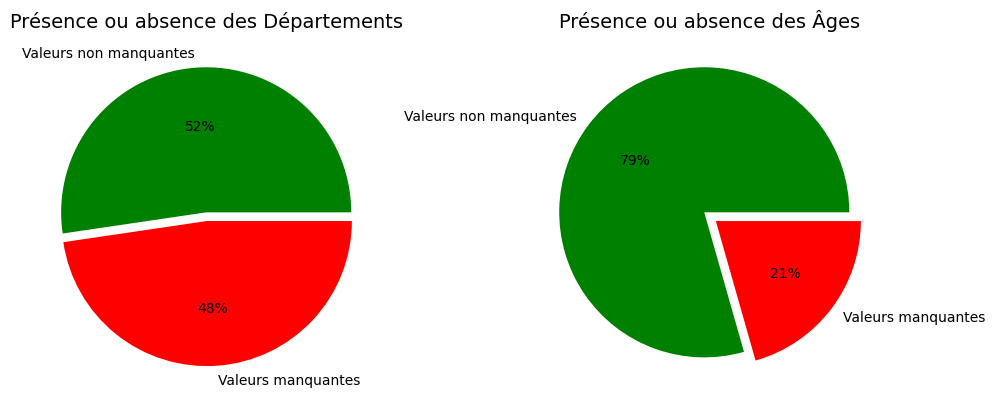

In [ ]:
# Création de la figure avec deux sous-graphiques côte à côte
# Configuration des graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 12))  # 2 lignes, 1 colonne, taille personnalisée

# Données et paramètres pour le premier graphique
colors = ["green", "red"]
labels = ["Valeurs non manquantes", "Valeurs manquantes"]
explode = [0.03, 0.03]
bdd = data['Département'].notnull().value_counts()

# Premier graphique (Présence ou absence des Départements)
axes[0].pie(
    bdd, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[0].set_title("Présence ou absence des Départements", fontsize=14)

# Données et paramètres pour le deuxième graphique
explode = [0.05, 0.05]
bdd1 = data['Âge'].notnull().value_counts()

# Deuxième graphique (Présence ou absence des Âges)
axes[1].pie(
    bdd1, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[1].set_title("Présence ou absence des Âges", fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


* ## VISUALISATION GRAPHIQUE DES DONNEES

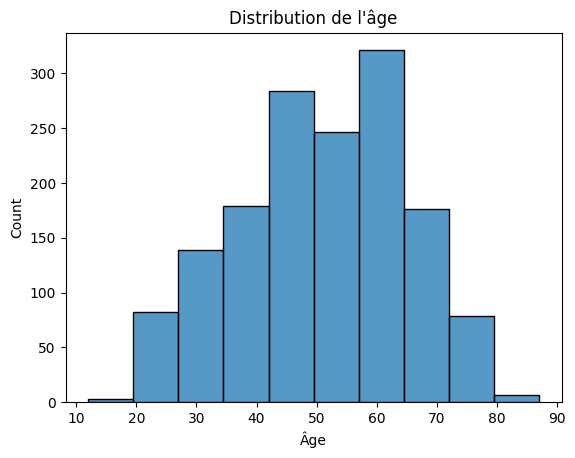

In [41]:

sns.histplot(data=data, x='Âge', bins=10, kde=False)
plt.title('Distribution de l\'âge')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10516\1421094456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False), palette='viridis', stat = 'proportion')


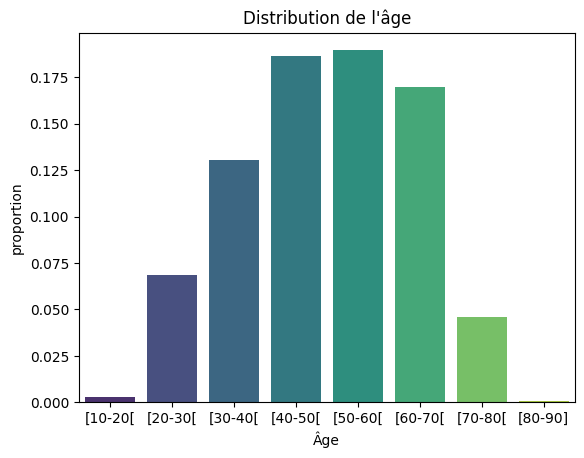

In [62]:
bins = [10,20,30,40,50,60,70,80,90]  # Limites des intervalles
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[','[80-90]']

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False), palette='viridis', stat = 'proportion')
plt.title('Distribution de l\'âge')
plt.show()

* ## Analyse des votes

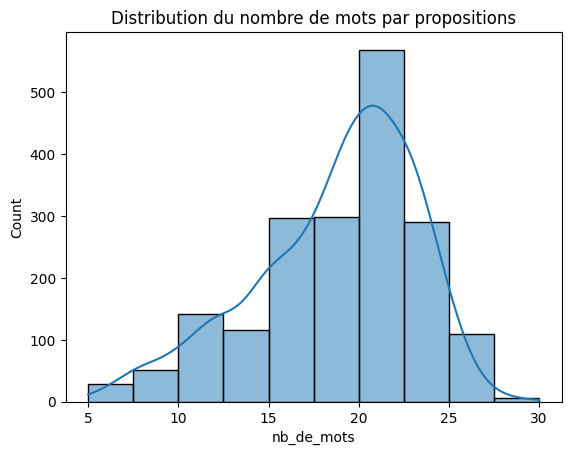

In [42]:
sns.histplot(data=data, x='nb_de_mots', bins=10, kde=True)
plt.title('Distribution du nombre de mots par propositions')
plt.show()

* ## Distribution du nombre de vote

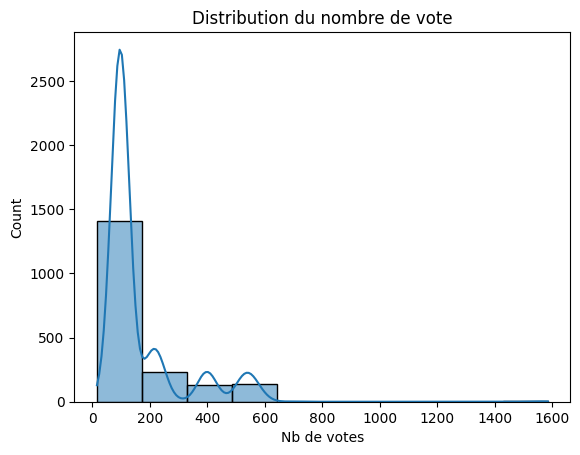

In [43]:
sns.histplot(data=data, x='Nb de votes', bins=10, kde=True)
plt.title('Distribution du nombre de vote')
plt.show()

* ## Distribution moyenne des types de vote

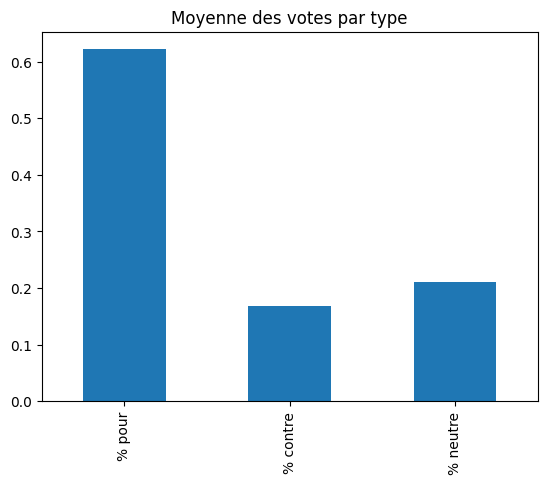

In [44]:
mean_votes = data[['% pour', '% contre', '% neutre']].mean()
mean_votes.plot(kind='bar', title='Moyenne des votes par type')
plt.show()

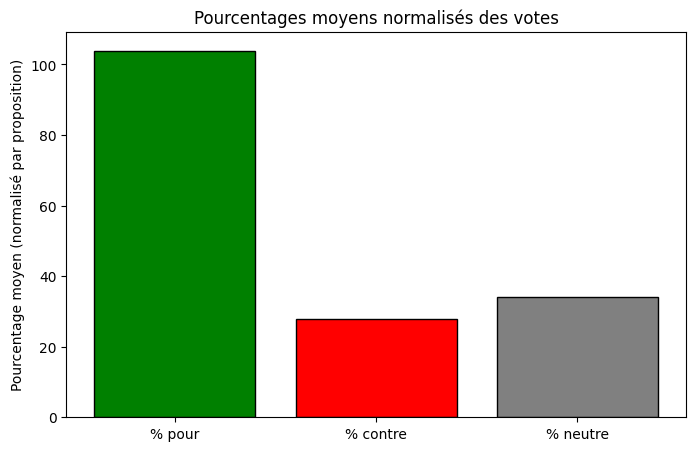

In [68]:
data['Nb de votes'] = data['Nb de votes'].replace(0, np.nan).fillna(1)

 

# Normalisation des pourcentages

data['% pour normalisé'] = data['% pour'] * data['Nb de votes']

data['% contre normalisé'] = data['% contre'] * data['Nb de votes']

data['% neutre normalisé'] = data['% neutre'] * data['Nb de votes']

 

# Calculer la moyenne des pourcentages normalisés

normalized_means = {

    '% pour': data['% pour normalisé'].mean(),

    '% contre': data['% contre normalisé'].mean(),

    '% neutre': data['% neutre normalisé'].mean()

}

 

# Création d'un DataFrame pour faciliter l'affichage

normalized_means_df = pd.Series(normalized_means)

 

# Tracer le diagramme en barres des pourcentages normalisés

plt.figure(figsize=(8, 5))

plt.bar(normalized_means_df.index, normalized_means_df.values, edgecolor='black', color=['green', 'red', 'grey'])

plt.title("Pourcentages moyens normalisés des votes")

plt.ylabel("Pourcentage moyen (normalisé par proposition)")

plt.show()

* ## Categorisation des propositions

In [65]:
# Fonction pour déterminer la catégorie dominante
def get_dominant_category(row):
    if row['% pour normalisé'] > row['% contre normalisé'] and row['% pour normalisé'] > row['% neutre normalisé']:
        return 'pour'
    elif row['% contre normalisé'] > row['% pour normalisé'] and row['% contre normalisé'] > row['% neutre normalisé']:
        return 'contre'
    else:
        return 'neutre'

# Ajouter une nouvelle colonne
data['Catégorie'] = data.apply(get_dominant_category, axis=1)

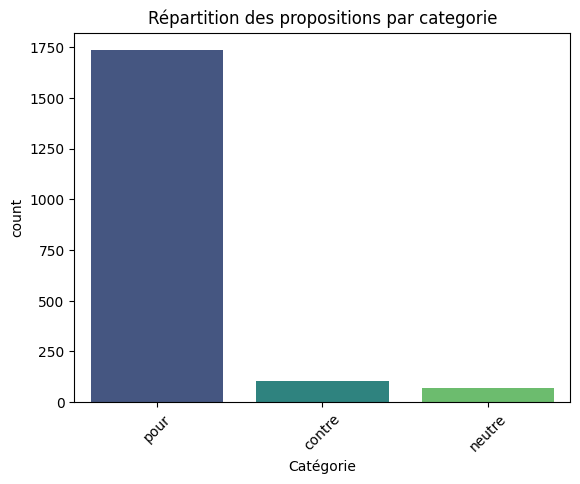

In [66]:
sns.countplot(data=data, x='Catégorie', palette='viridis', hue = "Catégorie")
plt.title('Répartition des propositions par categorie')
plt.xticks(rotation=45)
plt.show()

* ## Distribution des zones d'adhésion

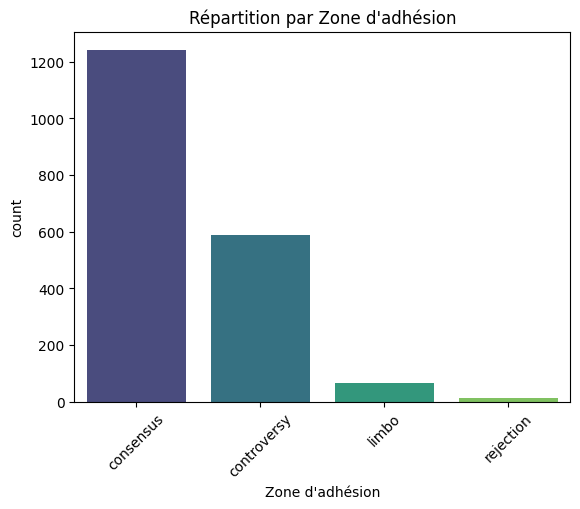

In [47]:
sns.countplot(data=data, x='Zone d\'adhésion', palette='viridis', hue="Zone d\'adhésion")
plt.title('Répartition par Zone d\'adhésion')
plt.xticks(rotation=45)
plt.show()

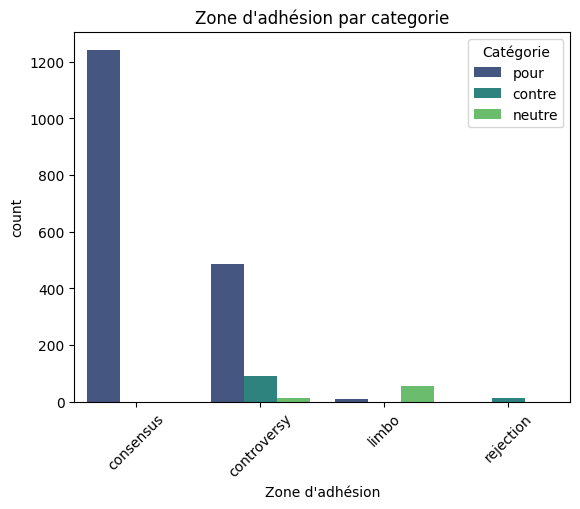

In [48]:
sns.countplot(data=data, x='Zone d\'adhésion', palette='viridis', hue="Catégorie")
plt.title('Zone d\'adhésion par categorie')
plt.xticks(rotation=45)
plt.show()

* # Analyse des mots les plus fréquents dans les propositions (sans nettoyage initial).

In [50]:
from collections import Counter

# Compter les mots 
word_counts = Counter(" ".join(data['Proposition']).split())
print(word_counts.most_common(10)) 


[('Il', 1911), ('faut', 1907), ('les', 1554), ('de', 1440), ('des', 1052), ('et', 927), ('pour', 736), ('à', 727), ('le', 717), ('la', 688)]


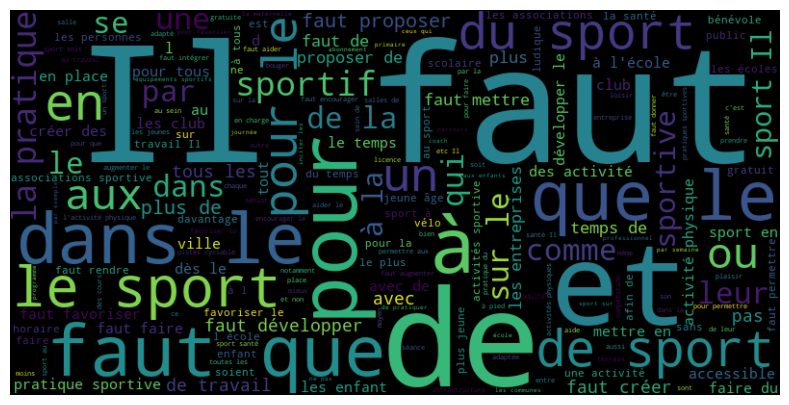

In [51]:
# Générer un nuage de mots à partir des propositions pour visualiser les mots les plus fréquents
# On fusionne toutes les propositions en une seule chaîne de caractères
text = " ".join(data['Proposition']) #
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear") # Pour afficher l'image avec une interpolation fluide
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Prétraitement des données textuelles

In [52]:
import nltk # Bibliothèque pour le NLP
from nltk.corpus import stopwords # Liste de mots très fréquents mais sans valeur sémantique (stopwords)
from nltk.tokenize import word_tokenize # Découpe une phrase en mots (tokenisation)
from nltk.stem import WordNetLemmatizer # Réduit les mots à leur forme de base (lemmatisation)

In [53]:
# Télécharger les stopwords
nltk.download('stopwords') # Liste de mots inutiles comme "le", "la", "et", etc.
nltk.download('punkt') # tokenisation
nltk.download('wordnet') # Lemmatisation (réduction des mots à leur racine)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french')) # Charger les stopwords pour la langue française

# Fonction pour nettoyer le texte
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Mise en minuscule et tokenisation
    tokens = [word for word in tokens if word.isalpha()]  # Retirer les chiffres et ponctuations
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in ['faut','comme','plus','tous']]
    return " ".join(tokens) # Recomposer le texte à partir des mots nettoyés

data['cleaned_propositions'] = data['Proposition'].apply(preprocess_text)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\DELL/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [41]:
print(data['cleaned_propositions'])

0       sensibiliser enfants depuis jeune âge école ma...
1       commune facilitent marche ville aménageant iti...
2       dès faire lien entre santé sport démontrer jeu...
3       être très rigoureux état bienveillant a droit ...
4       permettre ceux handicap souhaitent faire sport...
                              ...                        
1904    adopter chien ça fera minimum minute marche fo...
1905    pouvoir exclure tout membre fédération résulta...
1906    réduire nombre bus ville obliger marche semble...
1907    inciter français montres connectées stimuler b...
1908               encourager garçons club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* ## Les mots les plus frequents

In [43]:
# Compter les mots 
word_counts = Counter(" ".join(data['cleaned_propositions']).split())
print(word_counts.most_common(20)) 

[('sport', 854), ('sportives', 207), ('faire', 190), ('pratique', 185), ('physique', 164), ('temp', 160), ('club', 154), ('sportifs', 144), ('sportive', 137), ('activités', 129), ('enfants', 123), ('santé', 122), ('proposer', 122), ('travail', 122), ('développer', 109), ('association', 106), ('favoriser', 101), ('dès', 97), ('activité', 91), ('créer', 91)]


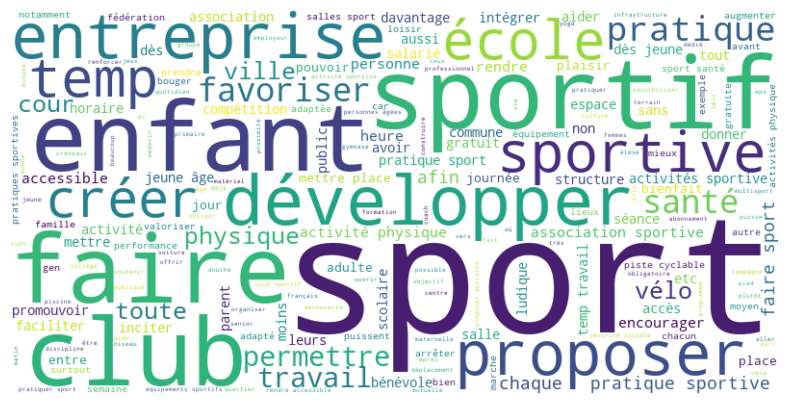

In [44]:
text = " ".join(data['cleaned_propositions']) 
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Modélisation des thématiques avec Word2Vec

In [46]:
pip install --upgrade scipy gensim



  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)


In [47]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [48]:
from gensim.models import Word2Vec # Bibliothèque pour entraîner des modèles Word2Vec

In [49]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins considérés
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de cœurs utilisés pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=200, window=9,sg=1,  min_count=3, workers=9)

# Exemples de mots similaires
print(model.wv.most_similar("sport"))


[('car', 0.9989350438117981), ('être', 0.9989331960678101), ('non', 0.9989247918128967), ('lycées', 0.9989187717437744), ('financièrement', 0.9988975524902344), ('fois', 0.9988737106323242), ('petits', 0.9988709092140198), ('social', 0.9988587498664856), ('prévoir', 0.9988555908203125), ('subvention', 0.9988516569137573)]


* # Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)

In [51]:
# Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)
skip_gram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=2)
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=0, min_count=2)


* # Analyse des thématiques

In [53]:
from sklearn.cluster import KMeans
import numpy as np

In [54]:
# Récupérer les mots et leurs vecteurs
words = list(model.wv.index_to_key)  # Tous les mots du vocabulaire
vectors = model.wv[words]  # Les vecteurs correspondants
print(vectors)

[[-0.0177072  -0.00131207 -0.02713279 ... -0.16377416 -0.03514467
  -0.10015178]
 [-0.01444094 -0.00544399 -0.03337511 ... -0.16645148 -0.03304983
  -0.10540188]
 [-0.01956186  0.00096883 -0.03451332 ... -0.16770293 -0.02790702
  -0.10557043]
 ...
 [-0.00671029 -0.00039399 -0.01536453 ... -0.09193525 -0.02071028
  -0.06021826]
 [-0.00304279 -0.00248187 -0.01480664 ... -0.0628664  -0.00834622
  -0.04280417]
 [-0.00856604 -0.00169825 -0.01111074 ... -0.08730192 -0.01691296
  -0.05885999]]


In [55]:
# Fonction pour calculer le vecteur moyen d'une proposition

def get_mean_vector(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:  # Si des mots de la proposition sont dans le modèle
        return np.mean(word_vectors, axis=0)
    else:  # Si aucun mot de la proposition n'est dans le modèle
        return np.zeros(model.vector_size)


In [56]:
# Calculer un vecteur moyen pour chaque proposition

data['mean_vector'] = data.apply(
    lambda row: get_mean_vector(row['cleaned_propositions'], model),
    axis=1
)
print(data['mean_vector'])


0       [-0.015338543, 0.0037163452, -0.029596852, 0.0...
1       [-0.0149325095, -0.0027294597, -0.030263955, 0...
2       [-0.015811626, -0.00013211739, -0.030075643, 0...
3       [-0.01786618, -0.00094848033, -0.029102925, 0....
4       [-0.014919273, -0.0032127532, -0.028667765, 0....
                              ...                        
1904    [-0.013791684, -0.0034622978, -0.02789765, 0.0...
1905    [-0.014206413, -0.0014079845, -0.026780615, 0....
1906    [-0.015756562, -0.0016382954, -0.031641584, 0....
1907    [-0.014210464, -0.0027056527, -0.02401982, 0.0...
1908    [-0.009847504, -0.0036244325, -0.020881578, 0....
Name: mean_vector, Length: 1909, dtype: object


* # Optimisation du nombre de clusters

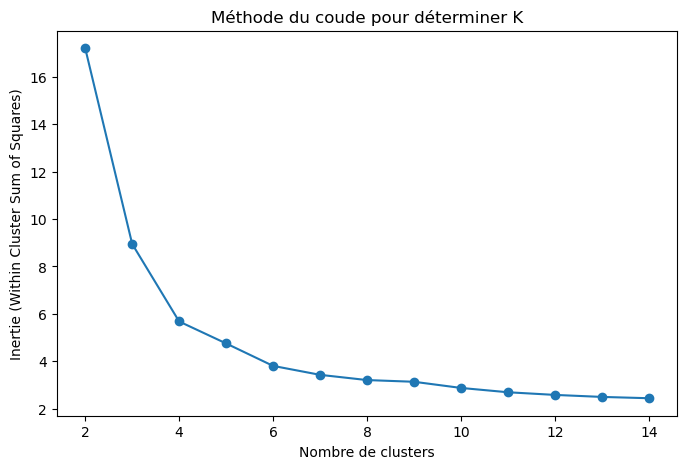

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculer l'inertie pour différents nombres de clusters
inertia = []
range_clusters = range(2, 15)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectors)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (Within Cluster Sum of Squares)')
plt.title('Méthode du coude pour déterminer K')
plt.show()


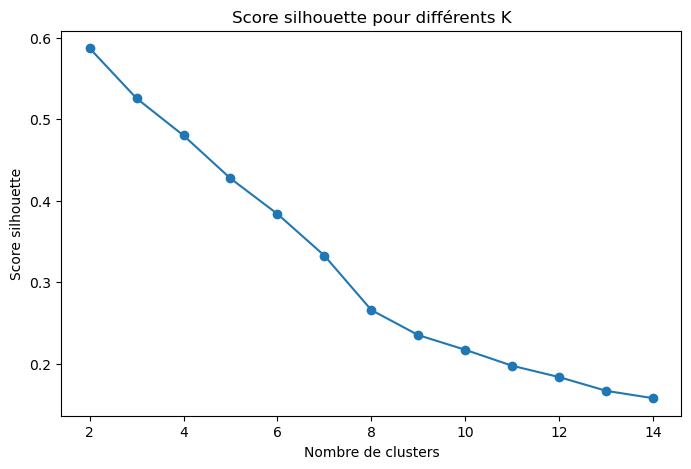

In [59]:
from sklearn.metrics import silhouette_score

# Calculer le score silhouette pour différents nombres de clusters
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(vectors)
    score = silhouette_score(vectors, labels)
    silhouette_scores.append(score)

# Tracer le score silhouette
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score silhouette')
plt.title('Score silhouette pour différents K')
plt.show()


In [60]:
# Convertir les vecteurs en liste pour compatibilité avec kmeans
proposition_vectors = np.vstack(data['mean_vector'].values)
# Extraire les vecteurs
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])
kmeans = KMeans(n_clusters=6, random_state=1).fit(word_vectors)


In [61]:
# Prédire les clusters pour chaque proposition
data['cluster'] = kmeans.predict(proposition_vectors)


In [62]:
# Associer chaque mot à un cluster
word_clusters = {word: cluster for word, cluster in zip(words, kmeans.labels_)}

In [63]:
# Afficher les mots par cluster
for cluster in range(6):
    print(f"\nCluster {cluster}:")
    print([word for word, label in word_clusters.items() if label == cluster])


Cluster 0:
['rien', 'animateurs', 'manière', 'inclure', 'prévention', 'nutrition', 'compte', 'pratiquent', 'meilleure', 'partir', 'promotion', 'moment', 'nouveaux', 'projets', 'liés', 'note', 'établissements', 'communiquer', 'voisins', 'entraîneurs', 'urbains', 'font', 'financement', 'sécurisés', 'ordonnance', 'médiatiques', 'ca', 'fédération', 'art', 'prescrire', 'minimum', 'employés', 'frais', 'éloignés', 'condition', 'déplacer', 'collectifs', 'hors', 'partage', 'depuis', 'changer', 'atelier', 'redonner', 'défis', 'état', 'façon', 'meilleur', 'noter', 'élargir', 'offres', 'ado', 'doux', 'matière', 'chi', 'équipes', 'chèques', 'outils', 'professeurs', 'gratuite', 'dehors', 'route', 'utiliser', 'class', 'passer', 'municipales', 'ticket', 'cause', 'réservés', 'selon', 'encadrement', 'financements', 'échauffement', 'travailler', 'ministère', 'étendre', 'continuer', 'médias', 'mettent', 'asso', 'aident', 'elles', 'partenariats', 'chaise', 'proposant', 'initier', 'mobilités', 'motivation'

In [64]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Réduction de dimension à 2D pour la visualisation
reducer = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_vectors = reducer.fit_transform(proposition_vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster in range(5):
    cluster_points = reduced_vectors[kmeans.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
    
#Ajouter les mots
#for i, word in enumerate(words):
#    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), alpha=0.7, fontsize=8)

plt.legend()
plt.title("Clustering des mots avec Word2Vec et K-Means")
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1909 but corresponding boolean dimension is 1061

<Figure size 1000x800 with 0 Axes>

In [ ]:
pip install optuna

In [ ]:
import optuna
from gensim.models import Word2Vec
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Définir la fonction d'objectif pour Optuna
def objective(trial):
    # Hyperparamètres à optimiser
    vector_size = trial.suggest_int("vector_size", 50, 300, step=50)
    window = trial.suggest_int("window", 3, 10)
    min_count = trial.suggest_int("min_count", 1, 5)
    
    # Entraîner le modèle Word2Vec avec les hyperparamètres
    model = Word2Vec(sentences=data['cleaned_propositions'], vector_size=vector_size, window=window, sg=1, min_count=min_count, workers=4)
    
    # Récupérer les vecteurs des mots
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]
    
    # Clustering avec K-Means
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(vectors)
    
    # Calcul du score silhouette
    labels = kmeans.labels_
    score = silhouette_score(vectors, labels)
    
    return score  # Maximiser le score silhouette

# Lancer l'optimisation
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Meilleurs hyperparamètres
print("Best hyperparameters:", study.best_params)


In [ ]:
def objective_kmeans(trial):
    # Nombre de clusters à optimiser
    num_clusters = trial.suggest_int("num_clusters", 2, 15)
    
    # Appliquer K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(vectors)
    
    # Calculer le score silhouette
    labels = kmeans.labels_
    score = silhouette_score(vectors, labels)
    
    return score  # Maximiser le score silhouette

# Lancer l'optimisation
study_kmeans = optuna.create_study(direction="maximize")
study_kmeans.optimize(objective_kmeans, n_trials=15)

# Meilleur nombre de clusters
print("Best number of clusters:", study_kmeans.best_params['num_clusters'])


In [ ]:
def combined_objective(trial):
    # Optimisation des paramètres Word2Vec
    vector_size = trial.suggest_int("vector_size", 50, 300, step=50)
    window = trial.suggest_int("window", 3, 10)
    min_count = trial.suggest_int("min_count", 1, 5)
    
    # Entraîner le modèle Word2Vec
    model = Word2Vec(sentences=data['cleaned_propositions'], vector_size=vector_size, window=window, sg=1, min_count=min_count, workers=4)
    
    # Récupérer les vecteurs
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]
    
    # Optimisation du nombre de clusters
    num_clusters = trial.suggest_int("num_clusters", 2, 15)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(vectors)
    
    # Calculer le score silhouette
    labels = kmeans.labels_
    score = silhouette_score(vectors, labels)
    
    return score

# Lancer l'optimisation combinée
study_combined = optuna.create_study(direction="maximize")
study_combined.optimize(combined_objective, n_trials=50)

# Résultats optimaux
print("Best parameters:", study_combined.best_params)


In [ ]:
print(data.shape)  # Taille du DataFrame
print(len(data['cluster']))  # Longueur du vecteur des clusters


In [ ]:
mean_votes = data.groupby('cluster')['% pour'].mean()
print(mean_votes)


In [ ]:
# Extraire les vecteurs
kmeans = KMeans(n_clusters=5, random_state=1).fit(proposition_vectors)

In [ ]:
# Associer chaque mot à un cluster
words = list(model.wv.key_to_index.keys())
clusters = {i: [] for i in range(5)}
for word, cluster in zip(words, kmeans.labels_):
    clusters[cluster].append(word)

In [ ]:
# Afficher les mots par cluster
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {', '.join(words[:10])}")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer des nuages de mots pour chaque cluster
for cluster_id in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster_id]
    text = ' '.join(cluster_data['cleaned_propositions'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster_id}")
    plt.show()


In [ ]:
data.groupby('cluster')[['% pour', '% contre', '% neutre']].mean()
